**MAYA PUROHIT**

CS 251: Data Analysis and Visualization

Fall 2023

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 6 | Supervised Learning

The overall goal of this project is to implement an email spam filter to determine whether an email is spam (*spam*) or not (*ham*). You will implement and compare the performance of two supervised learning algorithms: **K Nearest Neighbors (KNN)** and **Naive Bayes**.

## Task 1: K Nearest Neighbors (KNN) Classifier

To start off the project, you will implement the **KNN classifier**, a bedrock, highly-versatile, nonparametric (i.e. *memory-based*) supervised learning algorithm. You will test out and experiment with KNN on a **multi-class spiral 2D dataset**.

### 1a. Load and visualize spiral data

- Below, load in both spiral datasets 1 (`spiral_train_1.csv`, `spiral_val_1.csv`) and 2 (`spiral_train_2.csv`, `spiral_val_2.csv`). Each training set has 4,000 samples and each validation set has 1,200 samples (*there is no test set for this development dataset*).
- Create a 2x2 grid plot showing the train and validation data side-by-side in each version of the dataset.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of spiral data

- Column 1: x coordinate of a 2D point (on a spiral).
- Column 2: y coordinate of a 2D point (on a spiral).
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1, 2, 3]

Spiral 1 train (4000, 3), classes (4000,)
Spiral 1 validation (1200, 3), classes (1200,)
Spiral 2 train (4000, 3), classes (4000,)
Spiral 2 validation (1200, 3), classes (1200,)


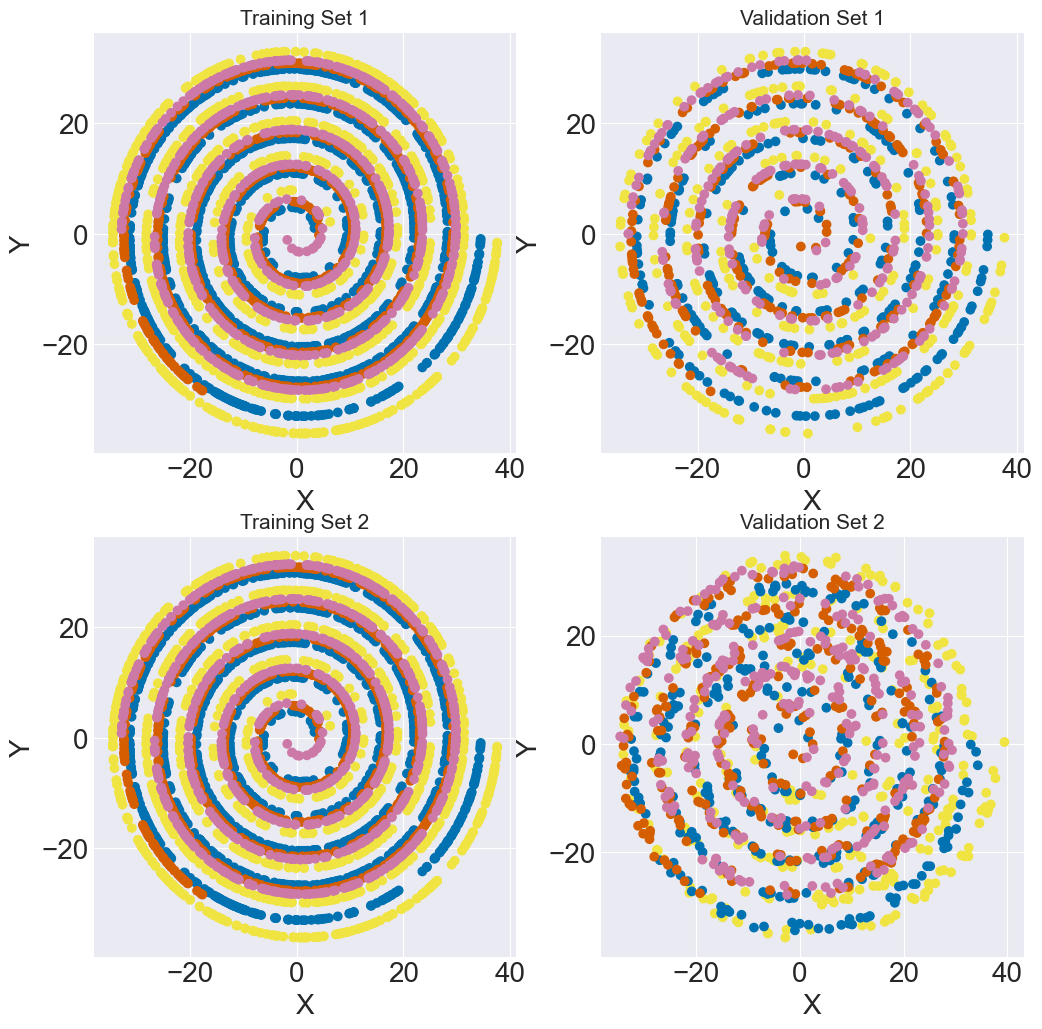

In [19]:
color = {0.0: '#F0E442', 1.0: '#0072B2', 2.0: '#D55E00', 3.0: '#CC79A7'}
spiral_1_train = pd.read_csv("data/spiral_train_1.csv")
spiral_1_train_y = spiral_1_train['class']

trainColor1 =spiral_1_train_y.astype("category").replace(color)

spiral_1_val = pd.read_csv("data/spiral_val_1.csv")
spiral_1_val_y = spiral_1_val['class']

valColor1 =spiral_1_val_y.astype("category").replace(color)

spiral_2_train = pd.read_csv("data/spiral_train_2.csv")
spiral_2_train_y = spiral_2_train['class']

trainColor2 =spiral_2_train_y.astype("category").replace(color)

spiral_2_val = pd.read_csv("data/spiral_val_2.csv")
spiral_2_val_y = spiral_2_val['class']
valColor2 =spiral_2_val_y.astype("category").replace(color)




print(f'Spiral 1 train {spiral_1_train.shape}, classes {spiral_1_train_y.shape}')
print(f'Spiral 1 validation {spiral_1_val.shape}, classes {spiral_1_val_y.shape}')
print(f'Spiral 2 train {spiral_2_train.shape}, classes {spiral_2_train_y.shape}')
print(f'Spiral 2 validation {spiral_2_val.shape}, classes {spiral_2_val_y.shape}')

fig, axes = plt.subplots(2,2, figsize = (12,12))
axes[0,0].scatter(spiral_1_train["x"], spiral_1_train["y"], c = trainColor1)
axes[0,0].set_title("Training Set 1", fontsize = 15)
axes[0,0].set_xlabel("X")
axes[0,0].set_ylabel("Y")


axes[0,1].scatter(spiral_1_val["x"], spiral_1_val["y"], c = valColor1)
axes[0,1].set_title("Validation Set 1", fontsize = 15)
axes[0,1].set_xlabel("X")
axes[0,1].set_ylabel("Y")


axes[1,0].scatter(spiral_2_train["x"], spiral_2_train["y"], c = trainColor2)
axes[1,0].set_title("Training Set 2", fontsize = 15)
axes[1,0].set_xlabel("X")
axes[1,0].set_ylabel("Y")

axes[1,1].scatter(spiral_2_val["x"], spiral_2_val["y"], c = valColor2)
axes[1,1].set_title("Validation Set 2", fontsize = 15)
axes[1,1].set_xlabel("X")
axes[1,1].set_ylabel("Y")

spiral_1_train = spiral_1_train.to_numpy()[:, :2]
spiral_1_train_y = spiral_1_train_y.to_numpy()

spiral_2_train = spiral_2_train.to_numpy()[:, :2]
spiral_2_train_y = spiral_2_train_y.to_numpy()

spiral_1_val = spiral_1_val.to_numpy()[:, :2]
spiral_1_val_y = spiral_1_val_y.to_numpy()

spiral_2_val = spiral_2_val.to_numpy()[:, :2]
spiral_2_val_y = spiral_2_val_y.to_numpy()



### 1b. Implement KNN

Implement the following methods in `knn.py`. Test relevant methods using the test code below.

- Constructor
- `train(data, y)`: Train the KNN classifier on the data `data`, where training samples have corresponding class labels in `y`.
- `predict(data, k)`: Use the trained KNN classifier to predict the class label of each test sample in `data`. Determine class by voting: find the closest `k` training exemplars (training samples) and the class is the majority vote of the classes of these training exemplars.
- `accuracy(y, y_pred)`: Compute percent correct given true data labels `y` and algorithm predicted labels `y_pred`. 

In [55]:
from knn import KNN

#### Test: Accuracy

In [54]:
np.random.seed(0)
test_y = np.random.randint(low=0, high=11, size=(50,))
test_y_pred = np.random.randint(low=0, high=11, size=(50,))

classifier = KNN(num_classes=0)
acc = classifier.accuracy(test_y, test_y_pred)
print(f'Test accuracy is {acc} and should be 0.06.')

Test accuracy is 0.06 and should be 0.06.


#### Test: 1-NN

In [53]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 1
spiral_1_y_pred = classifier.predict(spiral_1_train, k)
acc = classifier.accuracy(y=spiral_1_train_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=1 is {acc} and should be 1.0')

Your accuracy with K=1 is 1.0 and should be 1.0


#### Test 2-NN

*Note: The below test code assumes that you resolve voting ties with the class that has a lower index. There is a numpy function that you may feel inclined to use (or not!) that handles this automatically.*

In [52]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 2
spiral_1_y_pred = classifier.predict(spiral_1_val, k)
acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=2 is {acc:.2f} and should be 0.88')

true_test_y = np.array([2., 2., 2., 2., 2., 3., 2., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 3., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

print(f'The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are\n{np.where(true_test_y != spiral_1_y_pred[750:900], 1, 0)}')
print('Seeing all 0s means everything seems to be working great!')

Your accuracy with K=2 is 0.88 and should be 0.88
The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Seeing all 0s means everything seems to be working great!


### 1c. Questions

**Question 1:** Explain why in the above 1-NN test, the accuracy must be 100%.

**Answer 1:** The accuracy must be 100% because we are using the same dataset to train the KNN classifier model and to make predictions. This means that the closest data point in the exemplar set to each data point in the prediction set will be itself. Therefore, we should always predict the correct class when we are only looking at one neighbor because we will always get the class of the data point itself from the exemplar set. 

### 1d. Find the best `k`

- Below, "script" your `predict` method on both spiral datasets 1 and 2. Compute the accuracy on the respective test sets with many different values of `k`.
- Create two well-labeled plots, one for each spiral dataset, showing the accuracy for many different `k` values.

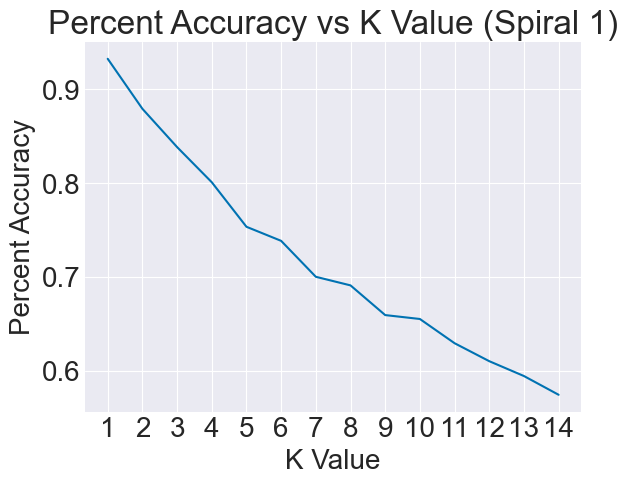

In [24]:
acc1 = []
classifier1 = KNN(num_classes=4)
classifier1.train(spiral_1_train, spiral_1_train_y)
for k in range(1,15):
    spiral_1_y_pred = classifier1.predict(spiral_1_val, k)
    acc = classifier1.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
    acc1.append(acc)

plt.plot(range(1,15), acc1)
plt.xticks(range(1,15))
plt.xlabel("K Value")
plt.ylabel("Percent Accuracy")
plt.title("Percent Accuracy vs K Value (Spiral 1)")
plt.show()


    


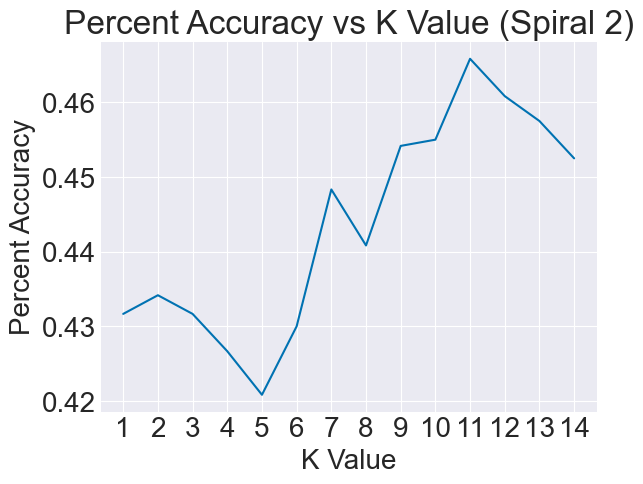

In [25]:
acc2 = []
classifier2 = KNN(num_classes=4)
classifier2.train(spiral_2_train, spiral_2_train_y)
for k in range(1, 15):
    spiral_2_y_pred = classifier2.predict(spiral_2_val, k)
    acc = classifier2.accuracy(y=spiral_2_val_y, y_pred=spiral_2_y_pred)
    acc2.append(acc)

plt.plot(range(1,15), acc2)
plt.xlabel("K Value")
plt.ylabel("Percent Accuracy")
plt.title("Percent Accuracy vs K Value (Spiral 2)")
plt.xticks(range(1,15))
plt.show()

### 1e. Questions

**Question 2:** What is the `k` that results in the highest accuracy on each spiral dataset?

**Question 3:** Why are the accuracies are so different across the datasets? (*Hint: look at the data*)

**Question 4:** Why are the best `k` values are so different across the datasets?

**Question 5:** Is it a good idea to always set `k` to one of these values when working with another dataset?

**Answer 2:**
For the first spiral dataset, having the K value equal to 1 leads to the highest accuracy and for the second spiral dataset, having the K-value equal to 11 leads to the highest accuracy.

**Answer 3:**
In the first spiral dataset, the accuracy is always above 50% for the first 14 k-values. For the second spiral dataset, the accuracy is always below 50% for the first 14 k-values. This is likely due to the fact that the validation set for spiral 1 is more similar to the spiral 1 training set than the spiral 2 validation set is for the spiral 2 training set. While the position of the validation set data points mirrors the position of the training set data points for both of the spiral datasets, the class of the data points seem to differ more for spiral 2 than for spiral 1 when comparing the validation and training sets. This means that on average, trying to predict the class of the data points based upon the class of the neighboring exemplars will lead to a low accuracy for the spiral 2 dataset unless the number of neighbors looked at is relatively high. For the spiral 1 dataset, the accuracy will be much higher with a lower k-value because the class distribution is very similar for both the validation set and the training set. This means that when the algorithm looks at the neighbors of the test sample, the class that is predicted will likely be more accurate because the classes of the closest points are similar for both the validation and the training set. 

**Answer 4:** Since the distribution of class and position of datapoints is very similar for spiral dataset 1, looking at 1 neighbor will lead to a very high accuracy. Most of the test points in the validation set are very close to a point in the training set that have the same class as them. Therefore, when we look at 1 neighbor, we are likely to get a very high accuracy because the closest neighbor likely has the same class as the point in the validation set that we are trying to find the class for. When we increase the number of neighbors we look at for spiral dataset 1, we get less accurate because we will include points with different classes, which will make the algorithm less likely to predict the correct class for the point. For spiral dataset 2, the position of the datapoints in similar but the class distribution is different. This means that the points closest to a test point in the training set will likely not have the same class as the test point. If we look at a small number of neighbors for spiral dataset 2, the accuracy will not be very high because the neighbors of a point don't accurately reflect the class of the point itself. We need to look at more neighbors for the accuracy to be higher.

**Answer 5:** No, the value of K should depend on how similar the training and validation set are. If the distribution of the points and the classes is similar, having a small K-value will increase accuracy. However, if the training and the validation set are very different, having a higher k-value (looking at more neighbors) will likely increase accuracy. The value of K is heavily dependent on the dataset. The same k-value should not be used for different datasets.

### 1f. Visualize class boundaries

- Implement `plot_predictions` in `knn.py` to visualize how different regions of the (2D) dataspace would be classified. In this visualization, use four discrete colors to represent each of the classes. For example, if KNN would classify (x, y) = (10, 10) to spiral 2, you would color that region blue (for example). You will repeat this for lots of different regularly spaced x,y points to get a better picture of the regions that would be predicted to belong to different classes.
- For spiral dataset 1 and 2, plot the class boundaries for the k best value determined above.

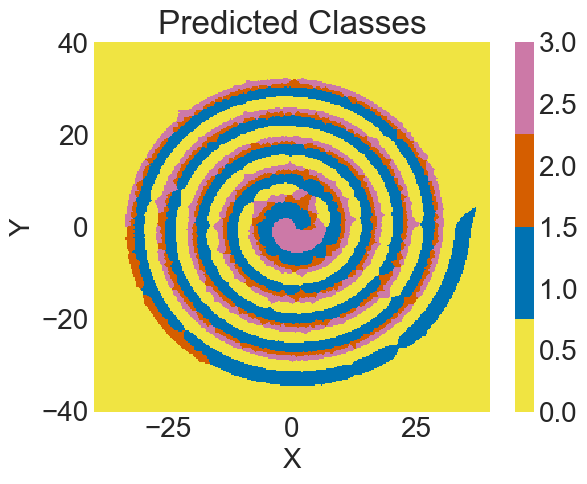

In [26]:
# Visualize KNN boundary 1
classifier1.plot_predictions(k = 1, n_sample_pts=300)


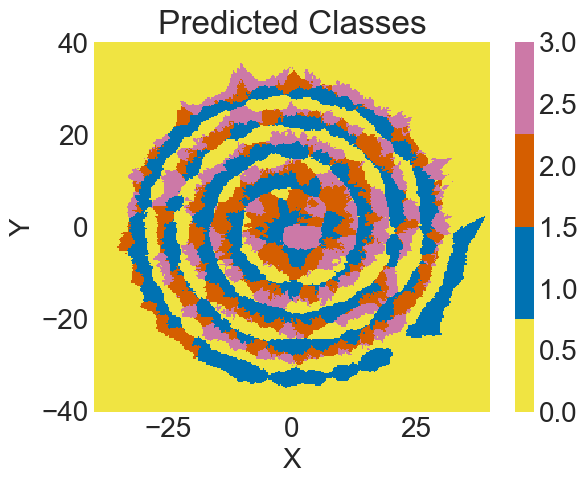

In [27]:
# Visualize KNN boundary 2
classifier2.plot_predictions(k = 11, n_sample_pts=300)

### 1g. Questions

**Question 6:** Why could visualizing the class boundaries be useful?

**Answer 6:** It is helpful to plot the class boundaries so that we can see the distribution of the predicted classes for the generated data. The class boundaries when compared with the original training data can give us insight into how accurate our prediction model is visually. It could also tell us which areas in the graph the prediction model tends to make mistakes or guess the wrong class. The class boundaries give us an understanding of the areas where the prediction model is accurate and areas where it is not to show its usability. The color boundaries give us a visual way to assess the accuracy of the model we have created. Observing above, we can see there are clearer class distinctions for spiral 1.

## Task 2: Spam email preprocessing pipeline

Before you can build a spam email filter, you need to transform the email data into a suitable format so that KNN or other supervised learning algorithms can process them (this is called **preprocessing**).

In this project, you will work with the **Enron email dataset**, a large dataset consisting of ~34,000 emails. Enron is an energy company that famously went bankrupt in the early 2000s after committing massive accounting fraud (more info: https://en.wikipedia.org/wiki/Enron). The US government seized company emails during their investigation and they were released to the public much later and nowadays is a commonly used dataset in machine learning. 

Your eventual goal will be to train a supervised learning algorithm on some of the emails and predict whether the remaining ones are spam or not.

But first...onto the preprocessing!

### Overall preprocessing strategy

We need to turn each email's text into something an algorithm can process (**features**). We will use a simple type of feature: **bag of words counts**. That is, we will reduce an email into a vector of how many times words appeared in it.

*Problem:* There are too many words across all the emails. Processing the counts in each email would take too long. For example, there are more than 40,000 words across all the emails. If we were trying to predict whether 1,000 emails are spam or not, we would need to build a `1000 x 40000` matrix (count each of the 40,000 words in each of the 1,000 emails), which would take a very long time to process by the supervised learning algorithm. 

A work-around that works quite well is to restrict ourselves to the most frequent $W$ words in the email dataset. You can experiment with how many words to include (e.g. as an extension), but for concreteness we will set this $W=200$ in the core project. In the above example, we can then process `1000 x 200` matrix much more quickly.

### 2a. Determine email word frequency

The large size of the enron email dataset makes the debugging process cumbersome. In situations like this, it is common to work with a **development dataset** — a mini version of the full dataset that is much faster to work with. The enron dev dataset has 2 ham emails and 3 spam emails. 

- Download and extract the **Enron dev** emails. You should see a base `enron` folder, with `spam` and `ham` subfolders (these are the 2 classes), and documents in each with the raw email text. There should be 2 files in the ham folder and 3 files in the spam folder.
- In `email_preprocessor.py` implement `count_words(email_path)` to build up a python dictionary of all the words in the dataset (keys) and their associated counts (values).
- Write `find_top_words(word_freq)` to parse the dictionary and determine the top $W$ words.

In [28]:
import email_preprocessor as epp

#### Test `count_words` and `find_top_words`

In [51]:
word_freq, num_emails = epp.count_words(email_path='data/enron_dev/')


In [50]:
print(f'You found {num_emails} emails in the datset. You should have found 5.')

You found 5 emails in the datset. You should have found 5.


In [48]:
top_words, top_counts = epp.find_top_words(word_freq)
print(f"You found {len(top_words)}/19 words.")
print(f"Your top 2 words are\n{top_words[:2]}\nand they should be\n['subject', 'you']")
print(f"The counts of all the words are\n{top_counts}\nand they should be\n[5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]")
print(f"The 19 words should are\n{top_words}\n and they should be \n['subject', 'you', 'get', 'that', 'new', 'car', 'now', 'can', 'be', 'smart', 'love', 'ecards', 'christmas', 'tree', 'farm', 'pictures', 're', 'rankings', 'thank']\nwith the last 17 words in any order (because their counts are tied)")

You found 19/19 words.
Your top 2 words are
['subject', 'you']
and they should be
['subject', 'you']
The counts of all the words are
[5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
and they should be
[5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The 19 words should are
['subject', 'you', 'christmas', 'tree', 'farm', 'pictures', 're', 'rankings', 'thank', 'love', 'ecards', 'can', 'be', 'smart', 'get', 'that', 'new', 'car', 'now']
 and they should be 
['subject', 'you', 'get', 'that', 'new', 'car', 'now', 'can', 'be', 'smart', 'love', 'ecards', 'christmas', 'tree', 'farm', 'pictures', 're', 'rankings', 'thank']
with the last 17 words in any order (because their counts are tied)


### 2b. Make feature vectors based only on the top word counts

- Implement `make_feature_vectors`: Go back through the email folder structure and parse each email again. Now only count the frequency of words that are in the top $W$ word list. Keep track of whether each of these feature vectors are associated with a spam or not spam email.

In [47]:
hard_code_words = ['subject', 'you', 'get', 'that', 'new', 'car', 'now', 'can', 'be', 'smart', 'love', 'ecards', 'christmas', 'tree', 'farm', 'pictures', 're', 'rankings', 'thank']
features, y = epp.make_feature_vectors(hard_code_words, num_emails, email_path='data/enron_dev/')

In [46]:
firstSpamWordCounts = np.array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


print(f'Your matrix of features has shape:\n{features.shape}\nand it should be\n(5, 19).')
print(f'Your class label vector has shape:\n{y.shape}\nand it should be\n(5,).')
print(f"Make sure your features have 0's and 1's in every row")
print(features)
print('\nBelow, one number should be 3, the other should be 2.')
print(f'Number of emails of class 0: {np.sum(y == 0)}\nNumber of emails of class 1: {np.sum(y == 1)}')

inds = np.arange(len(features))
test_ind = inds[np.all(firstSpamWordCounts == features, axis=1)]
print(f'\nYour vector for 2958.2004-11-03.GP.spam.txt matches expected counts?\n{len(test_ind) == 1}\n')

Your matrix of features has shape:
(5, 19)
and it should be
(5, 19).
Your class label vector has shape:
(5,)
and it should be
(5,).
Make sure your features have 0's and 1's in every row
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Below, one number should be 3, the other should be 2.
Number of emails of class 0: 2
Number of emails of class 1: 3

Your vector for 2958.2004-11-03.GP.spam.txt matches expected counts?
True



### 2c. Make train and test splits of the dataset

Your matrix of features is for the entire dataset. We can't train the classifier on all these because then we won't have any emails left over to see how well your model's ability to discriminate spam/ham email generalizes to emails not seen during training!

Implement `make_train_test_sets` to divide the email features into a 80/20 train/test split (80% of data used to train the supervised learning model, 20% we withhold and use for testing / prediction).

In [44]:
np.random.seed(0)
x_train, y_train, inds_train, x_test, y_test, inds_test = epp.make_train_test_sets(features, y)

In [45]:
print('Shapes for train/test splits:')
print(f'Train {x_train.shape}, classes {y_train.shape}')
print(f'Test {x_test.shape}, classes {y_test.shape}')
print('\nThey should be:\nTrain (4, 19), classes (4,)\nTest (1, 19), classes (1,)')

Shapes for train/test splits:
Train (4, 19), classes (4,)
Test (1, 19), classes (1,)

They should be:
Train (4, 19), classes (4,)
Test (1, 19), classes (1,)
